<a href="https://colab.research.google.com/github/MoreenMarutaData/AUTOLIB-HYPOHESIS-PROJECT-CORE-IP-WEEK-4/blob/main/TITANIC_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import pandas as pd
import numpy as np

In [336]:
df1_train=pd.read_csv("https://archive.org/download/train5_202002/train%20%285%29.csv")
df1_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [337]:
df1_test=pd.read_csv("https://archive.org/download/test1_202002/test%20%281%29.csv")
df1_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###CHECKING, READING AND CLEANING TRAIN SET

In [338]:
df1_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [339]:
df1_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


only 38% survived 

most passengers were approximately 30yrs

In [340]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


cabin and age columns have missing values with cabin having more than 50% missing values

In [341]:
df1_train.shape

(891, 12)

In [342]:
df1_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [343]:
df1_train.duplicated().sum()

0

lets check for null values

In [344]:
df1_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

lets check for unique values in the cabin column

In [345]:
df1_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

lets check for unique values in the embark column

In [346]:
df1_train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [347]:
# lets check the missing values in the embarked column
df1_train.loc[df1_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [348]:
df1_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [349]:
# Fill null values with 'S'for most common occurence
common = 'S'
df1_train['Embarked']=df1_train['Embarked'].fillna('S')

# Checking the no of null values now
df1_train['Embarked'].isnull().sum()

0

from exploration of the dataset we can guess that “SibSp” and “Parch” together would make up a “FamilySize” so lets create a new feature for that

In [350]:
df1_train['FamilySize'] = df1_train['SibSp'] + df1_train['Parch']
df1_train.groupby('FamilySize').agg({"FamilySize" : 'count', "Survived" : 'mean'}).sort_index()

,FamilySize,Survived
FamilySize,,
0,537,0.303538
1,161,0.552795
2,102,0.578431
3,29,0.724138
4,15,0.200000
5,22,0.136364
6,12,0.333333
7,6,0.000000
10,7,0.000000


In [351]:
df1_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

looking at the age column

lets replace the missing values of age column with the median of each group

In [352]:
df1_train["Age"]=df1_train.groupby(["Pclass","Sex"])["Age"].apply(lambda x: x.fillna(x.median()))

lets check unique values for all columns

In [353]:
column_names = df1_train.columns.to_list()

for col in column_names:
  print(f'Column: {col} \n')
  print(df1_train[col].unique())
  print('\n')

Column: PassengerId 

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 

lets check for outliers

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df1_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

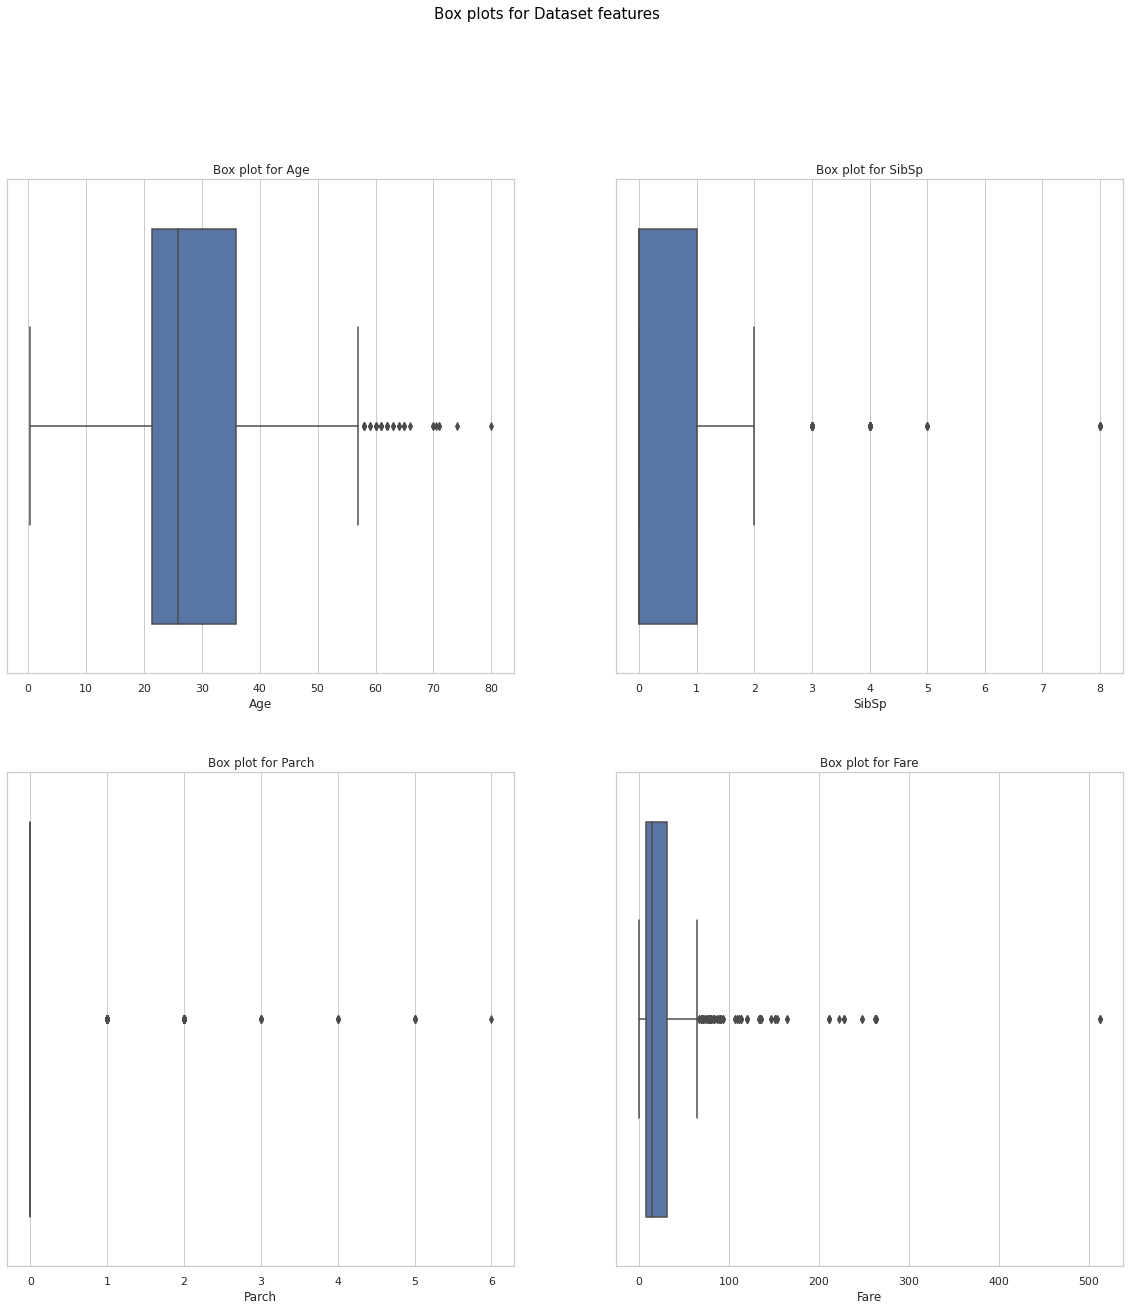

In [356]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
# label the title
fig.suptitle('Box plots for Dataset features', y= 1, color = 'black', fontsize = 15)
sns.set(style = 'whitegrid', context = 'notebook')

# Use a for loop to iterate through our num list
num=["Age",'SibSp','Parch', 'Fare']

for ax, data, name in zip(axes.flatten(), df1_train, num):
  sns.boxplot(df1_train[name], ax = ax)
  ax.set_title('Box plot for '+ name)  
plt.show()

### CHECKING, READING AND CLEANING TEST SET

In [357]:
df1_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [358]:
df1_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [359]:
df1_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [360]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [361]:
df1_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [362]:
df1_test.shape

(418, 11)

In [363]:
df1_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [364]:
df1_test.loc[df1_test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


he was in class 3, travelled alone, no family, embarked in S so we can takeothers in this category, replace the missing fare with the median of this group

In [367]:
thomas=df1_test.loc[(df1_test["Pclass"]==3) & (df1_test["Embarked"] == "S")]["Fare"].median()
print(thomas)
df1_test.loc[df1_test["Fare"].isnull(), "Fare"]=thomas

8.05


Check for outliers since we want our test features to match our train features for a good prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

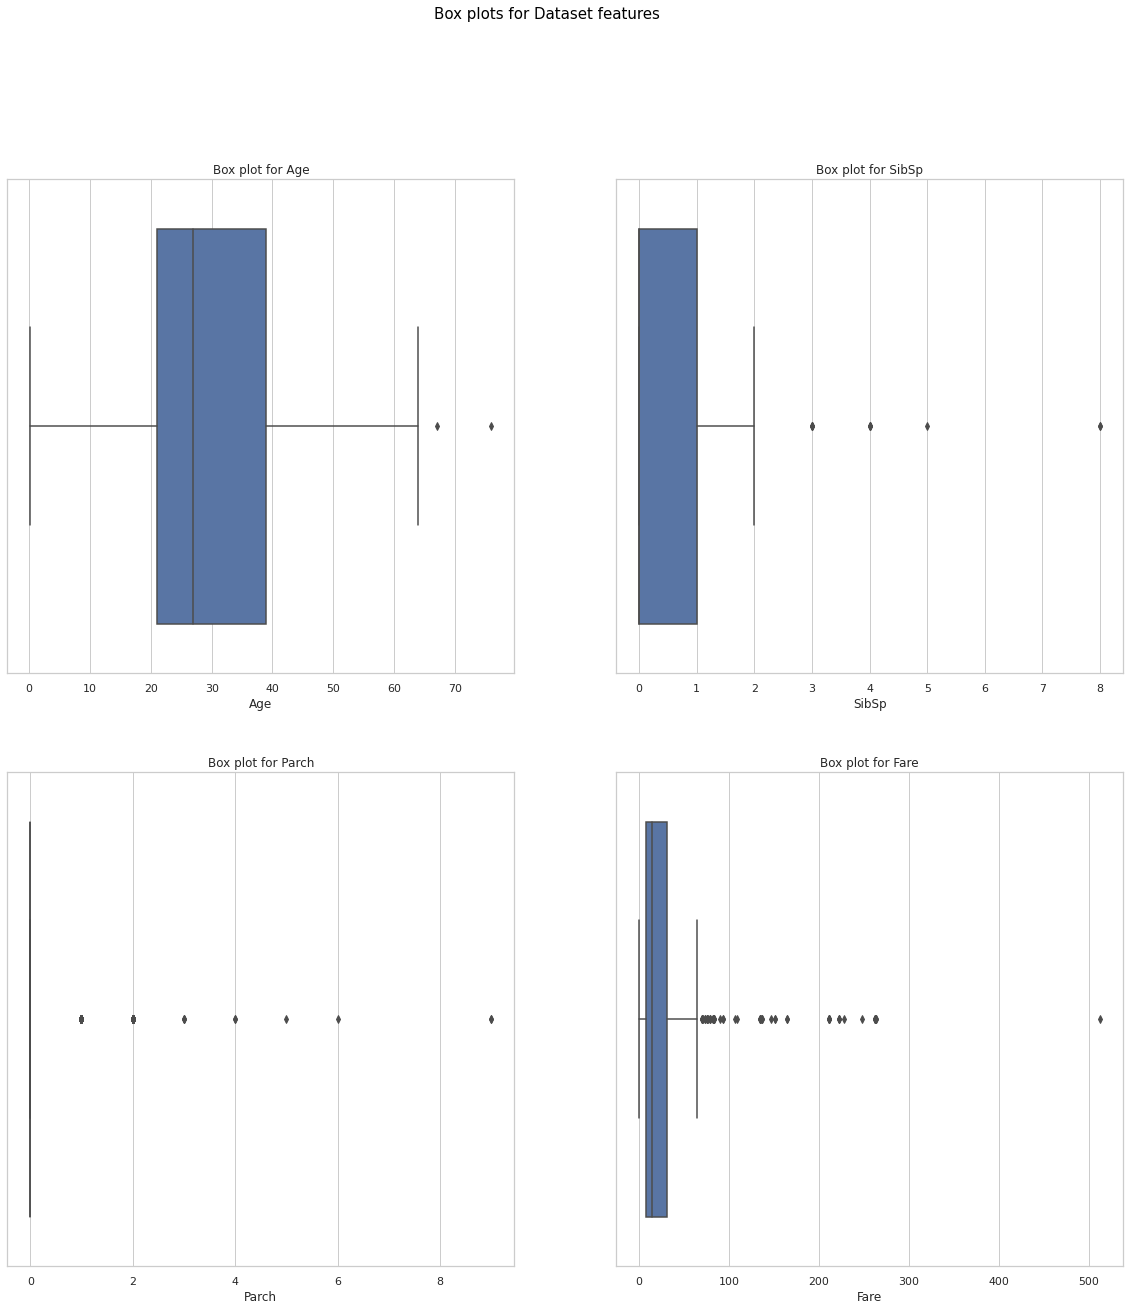

In [368]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
# label the title
fig.suptitle('Box plots for Dataset features', y= 1, color = 'black', fontsize = 15)
sns.set(style = 'whitegrid', context = 'notebook')

# Use a for loop to iterate through our num list
num=["Age",'SibSp','Parch', 'Fare']

for ax, data, name in zip(axes.flatten(), df1_test, num):
  sns.boxplot(df1_test[name], ax = ax)
  ax.set_title('Box plot for '+ name)  
plt.show()

In [369]:
# Fill null values with 'S'for most common occurence
common = 'S'
df1_test['Embarked']=df1_test['Embarked'].fillna('S')

# Checking the no of null values now
df1_test['Embarked'].isnull().sum()

0

fill missing ages values by the pclass 

In [370]:
df1_test["Age"]=df1_test.groupby(["Pclass","Sex"])["Age"].apply(lambda x: x.fillna(x.median()))

### EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0ee8d67d0>,
      dtype=object)

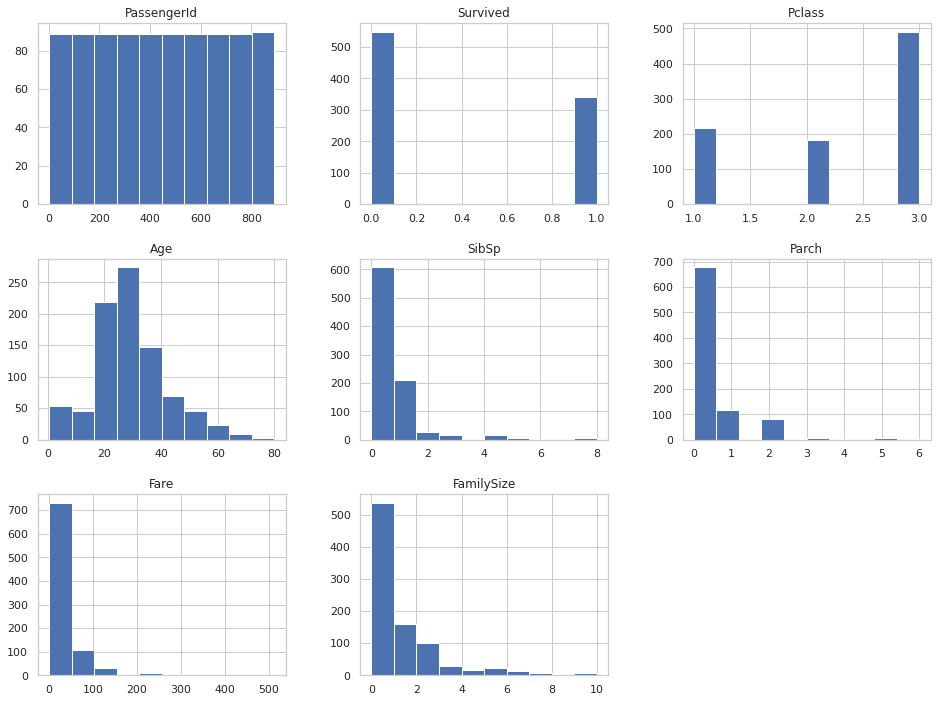

In [371]:
df1_train.hist(figsize=(16,12))

survival rate by family size

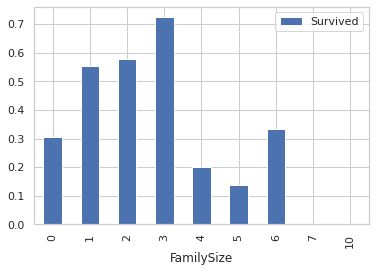

In [372]:
df1_train.groupby('FamilySize').agg({"Survived" : 'mean'}).plot(kind='bar')

survival rate by Pclass

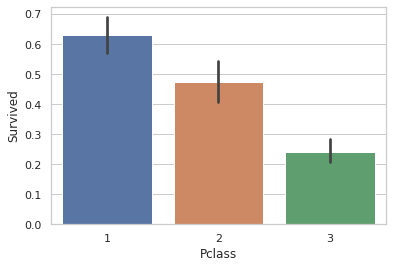

In [373]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=df1_train)

### FEATURE ENGINEERING

In [374]:
df1_train['Embarked'] = df1_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df1_train['Sex'] = df1_train['Sex'].map({'male':0, 'female':1})

In [375]:
df1_test['Embarked'] = df1_test['Embarked'].map({'C':0, 'Q':1, 'S':2})
df1_test['Sex'] = df1_test['Sex'].map({'male':0, 'female':1})

I’m going to remove the “PassengerId” and “Ticket” features as they don’t seem to add any real value

In [376]:
df1_train.drop(columns=['PassengerId','Ticket'], inplace=True)
df1_test.drop(columns=['PassengerId','Ticket'], inplace=True)


the passenger names are a problem however i feel like we could manipulate it in such a way that it could be beneficial to us. Back in the day everyone seemed to have a title so maybe if we can extract that from the name we could use it as a categorical feature.

In [377]:
df1_train['Title'] = df1_train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
df1_test['Title'] = df1_test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

In [378]:
df1_train.drop(columns=['Name','Cabin','FamilySize'], inplace=True)
df1_test.drop(columns=['Name','Cabin'], inplace=True)

In [379]:
df1_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Ms                1
Jonkheer          1
Mme               1
Lady              1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

In [380]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1_train['Title'] = le.fit_transform(df1_train['Title'])

le = preprocessing.LabelEncoder()
df1_test['Title'] = le.fit_transform(df1_test['Title'])

In [381]:
df1_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,11
1,1,1,1,38.0,1,0,71.2833,0,12
2,1,3,1,26.0,0,0,7.9250,2,8
3,1,1,1,35.0,1,0,53.1000,2,12
4,0,3,0,35.0,0,0,8.0500,2,11


In [382]:
df1_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,5
1,3,1,47.0,1,0,7.0000,2,6
2,2,0,62.0,0,0,9.6875,1,5
3,3,0,27.0,0,0,8.6625,2,5
4,3,1,22.0,1,1,12.2875,2,6


In [383]:
df1_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Survived,1.000000,-0.338481,0.543351,-0.059579,-0.035322,0.081629,0.257307,-0.167675,-0.193635
Pclass,-0.338481,1.000000,-0.131900,-0.413583,0.083081,0.018443,-0.549500,0.162098,0.029099
Sex,0.543351,-0.131900,1.000000,-0.102706,0.114631,0.245489,0.182333,-0.108262,-0.250075
Age,-0.059579,-0.413583,-0.102706,1.000000,-0.249854,-0.175526,0.122692,-0.007833,0.297177
SibSp,-0.035322,0.083081,0.114631,-0.249854,1.000000,0.414838,0.159651,0.068230,-0.200046
Parch,0.081629,0.018443,0.245489,-0.175526,0.414838,1.000000,0.216225,0.039798,-0.126422
Fare,0.257307,-0.549500,0.182333,0.122692,0.159651,0.216225,1.000000,-0.224719,-0.077461
Embarked,-0.167675,0.162098,-0.108262,-0.007833,0.068230,0.039798,-0.224719,1.000000,0.072621
Title,-0.193635,0.029099,-0.250075,0.297177,-0.200046,-0.126422,-0.077461,0.072621,1.000000


In [384]:
df1_test.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
Pclass,1.000000,-0.108615,-0.534379,0.001087,0.018721,-0.577484,0.227983,-0.135452
Sex,-0.108615,1.000000,-0.007134,0.099943,0.159120,0.192221,-0.076281,0.071979
Age,-0.534379,-0.007134,1.000000,-0.080162,-0.058455,0.348031,-0.131625,0.342297
SibSp,0.001087,0.099943,-0.080162,1.000000,0.306895,0.172028,0.052708,-0.138202
Parch,0.018721,0.159120,-0.058455,0.306895,1.000000,0.230408,0.054577,-0.018418
Fare,-0.577484,0.192221,0.348031,0.172028,0.230408,1.000000,-0.257785,-0.011083
Embarked,0.227983,-0.076281,-0.131625,0.052708,0.054577,-0.257785,1.000000,0.015648
Title,-0.135452,0.071979,0.342297,-0.138202,-0.018418,-0.011083,0.015648,1.000000


As expected the remaining feartures are not correlated so we can proceed to modelling of our data

### MODELLING

#### KNN CLASSIFIER

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [401]:
X = df1_train.drop(['Survived'],axis=1)
y = df1_train['Survived']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


standadizer = StandardScaler()
X_train = standadizer.fit_transform(X_train)
X_test = standadizer.transform(X_test)

# Reducing the dimensions in our dataset and specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model and setting k as 5
knn = KNeighborsClassifier(n_neighbors=5) 

# Training our model
knn.fit(X_train, y_train) 

# Making Predictions using our model 
y_pred_train= knn.predict(X_test) 
y_pred_test= knn.predict(X_train)

# Model Performance
print('Accuracy for test set: ', accuracy_score(y_test, y_pred_test))
print("Accuracy for train set: ", accuracy_score(y_train, y_pred_train))
print('\n')
print(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix(y_train, y_pred_train))
print('\n')
print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


ValueError: ignored

In [393]:
df1_train.shape

(891, 9)

In [394]:
df1_test.shape

(418, 8)

finding the best parameters

In [402]:
X = df1_train.drop(['Survived'],axis=1)
y = df1_train['Survived']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Splitting the data into test and train sets
X_train = df1_train.drop('Survived', axis = 1)
y_train = df1_train['Survived']
X_test = df1_test

standadizer = StandardScaler()
X_train = standadizer.fit_transform(X_train)
X_test = standadizer.transform(X_test)

# Instantiating our model and setting k as 5
knn = KNeighborsClassifier(n_neighbors=5) 

# Training our model
knn.fit(X_train, y_train) 

# Making Predictions using our model 

y_pred_train= knn.predict(X_test) 
y_pred_test= knn.predict(X_train)
